In [18]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [19]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data (1).csv
Saving fear_greed_index.csv to fear_greed_index (1).csv


In [ ]:
import os
os.listdir()


In [ ]:

trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")


In [22]:
trader_df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [23]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

# Data Cleaning & Merging


In [25]:
# Clean date columns - Historical data
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
trader_df['date'] = trader_df['Timestamp'].dt.date


In [27]:
# Clean date column - Sentiment data
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date



In [29]:
# Merge both datasets
merged_df = pd.merge(trader_df, sentiment_df, left_on='date', right_on='date', how='inner')


In [36]:

merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])
merged_df['date'] = merged_df['Timestamp'].dt.date


In [37]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'timestamp', 'value', 'classification', 'date'],
      dtype='object')

In [38]:

merged_df[['date', 'Coin', 'Closed PnL', 'Side', 'classification']].head()


,date,Coin,Closed PnL,Side,classification


In [42]:
print(trader_df['date'].head())
print(trader_df['date'].dtype)


0    1970-01-01
1    1970-01-01
2    1970-01-01
3    1970-01-01
4    1970-01-01
Name: date, dtype: object
object


In [43]:
print(trader_df['Timestamp'].head(10))


0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
5   1970-01-01 00:28:50
6   1970-01-01 00:28:50
7   1970-01-01 00:28:50
8   1970-01-01 00:28:50
9   1970-01-01 00:28:50
Name: Timestamp, dtype: datetime64[ns]


In [44]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
trader_df.dropna(subset=['Timestamp IST'], inplace=True)
trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [46]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date
sentiment_df.dropna(subset=['date'], inplace=True)


In [47]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')
print("Shape of merged_df:", merged_df.shape)
merged_df.head()


Shape of merged_df: (35864, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,2024-02-12,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,2024-02-12,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,2024-02-12,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,2024-02-12,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,2024-02-12,1707715800,70,Greed


In [48]:
merged_df.rename(columns={
    'Coin': 'symbol',
    'Closed PnL': 'closedPnL',
    'Side': 'side',
    'classification': 'Classification'
}, inplace=True)


# Exploratory Data Analysis(EDA)


/tmp/ipython-input-49-660280351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Classification', palette='Set2')


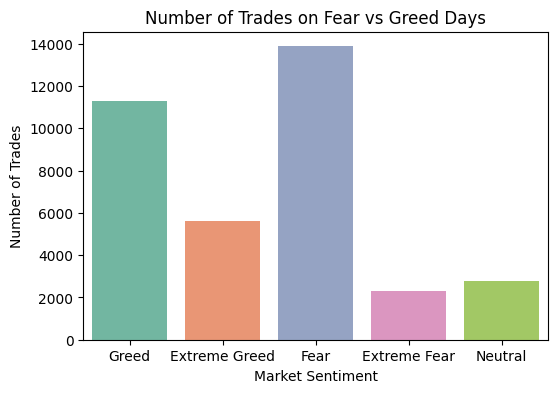

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='Classification', palette='Set2')
plt.title("Number of Trades on Fear vs Greed Days")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.show()

/tmp/ipython-input-51-658206605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Classification', y='closedPnL', palette='coolwarm')


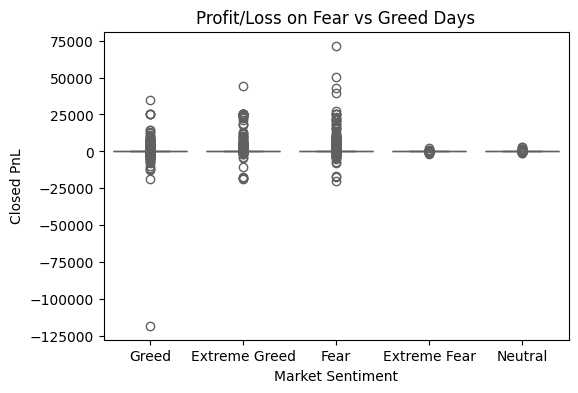

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(data=merged_df, x='Classification', y='closedPnL', palette='coolwarm')
plt.title("Profit/Loss on Fear vs Greed Days")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


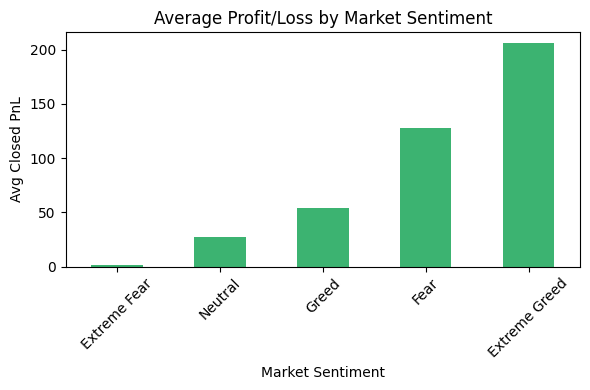

In [53]:
avg_pnl = merged_df.groupby('Classification')['closedPnL'].mean().sort_values()

plt.figure(figsize=(6,4))
avg_pnl.plot(kind='bar', color='mediumseagreen')
plt.title("Average Profit/Loss by Market Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
